# 🛡️ End-to-End Credit Card Fraud Detection System

## 📊 Dataset Overview

This project uses the **Credit Card Fraud Detection** dataset collected and analyzed by **Worldline** and the **Machine Learning Group (MLG)** at Université Libre de Bruxelles (ULB). It is a real-world dataset of anonymized credit card transactions made by European cardholders in September 2013.

---

### 🔍 Context
Credit card companies must quickly and accurately detect fraudulent transactions to prevent unauthorized charges and maintain customer trust. This dataset presents a challenging case due to the **high class imbalance**, where frauds make up only **0.172%** of all transactions.

---

### 📦 Dataset Details

- **Total Transactions**: 284,807  
- **Fraudulent Transactions**: 492  
- **Time Frame**: 2 days  
- **Features**:  
  - `V1` to `V28`: Principal components obtained via PCA (original features are confidential)  
  - `Time`: Seconds elapsed since the first transaction  
  - `Amount`: Transaction amount  
  - `Class`: Target variable (0 = genuine, 1 = fraud)

---

### 📉 Class Imbalance
Since the data is heavily imbalanced, traditional accuracy is not meaningful. We will focus on:
- **Precision, Recall, and F1-Score**
- **AUC-ROC**
- **Area Under the Precision-Recall Curve (AUPRC)**

---

### 📚 Citation & Acknowledgements

> Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson, Gianluca Bontempi.  
> *Calibrating Probability with Undersampling for Unbalanced Classification.* CIDM, IEEE, 2015.  
>  
> More info at: [MLG ULB](http://mlg.ulb.ac.be)  
> Related Book: [Fraud Detection Handbook](https://fraud-detection-handbook.github.io)



# ==========================================
# 📁 Step 1: Upload and Extract Dataset ZIP
# ==========================================


In [ ]:
# 📁 Uploading the dataset ZIP file manually from local system (Mac)
from google.colab import files

# Prompt user to upload the 'creditcardfraud.zip' file
uploaded = files.upload()  # Upload manually


Saving archive.zip to archive.zip


In [ ]:
# 📦 Unzipping the uploaded dataset
import zipfile
import os

# Unzip the file into the current working directory
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

# ✅ Check to confirm that the CSV has been extracted
print("Extracted files:", os.listdir())


Extracted files: ['.config', 'creditcard.csv', 'archive.zip', 'sample_data']


In [ ]:
# 📚 Importing essential libraries
import pandas as pd

# 🧾 Load the credit card transactions dataset into a pandas DataFrame
df = pd.read_csv('creditcard.csv')

# 👀 Display first 5 rows to understand the structure
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# 📊 Basic info about the dataset
print(f"✅ Dataset shape (rows, columns): {df.shape}")
print("\n📋 Data Types and Non-Null Counts:")
df.info()

# ❓ Check for missing values
print("\n🔎 Missing Values in Each Column:")
print(df.isnull().sum())


✅ Dataset shape (rows, columns): (284807, 31)

📋 Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19  

In [ ]:
# 📈 Count the number of normal vs. fraudulent transactions
class_counts = df['Class'].value_counts()
print("\n🧮 Class Distribution:\n", class_counts)

# 🚨 Check class imbalance ratio
fraud_ratio = class_counts[1] / class_counts.sum()
print(f"\n⚠️ Fraudulent Transaction Ratio: {fraud_ratio:.4f}")



🧮 Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

⚠️ Fraudulent Transaction Ratio: 0.0017


# 📊 Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand:
- The imbalance between fraudulent and genuine transactions
- Distribution of transaction amounts
- Temporal patterns in transactions
- Correlation among PCA components and their relation with fraud

This will help us uncover patterns and decide what features and techniques will work best for detecting fraud.


<ipython-input-7-4b146cdf7d15>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['skyblue', 'salmon'])


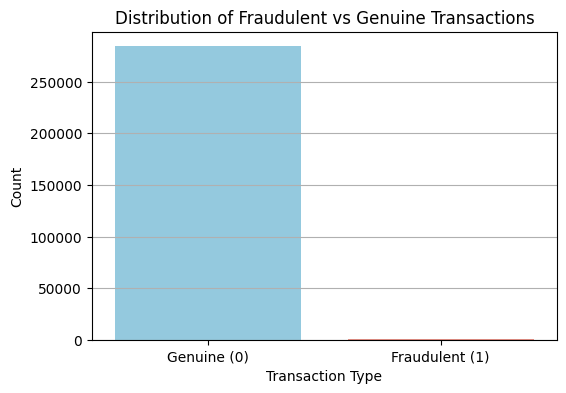

In [ ]:
# ==========================================
# 📊 Class Distribution Visualization
# ==========================================
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of each class
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent vs Genuine Transactions')
plt.xticks([0, 1], ['Genuine (0)', 'Fraudulent (1)'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


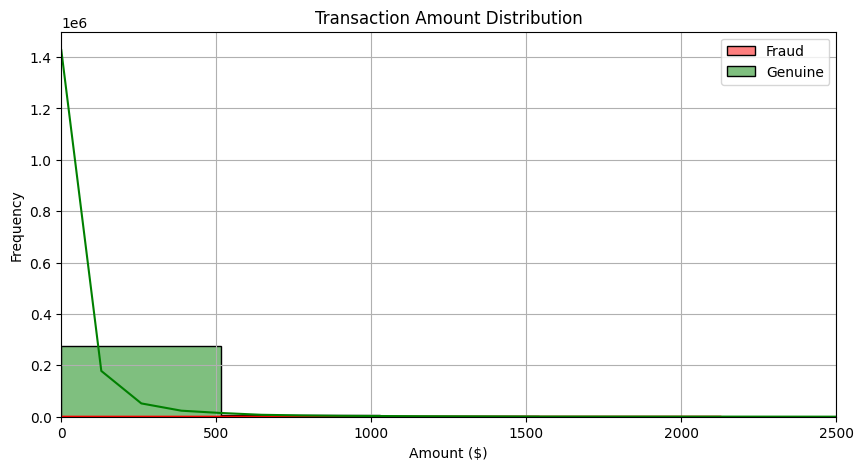

In [ ]:
# ==========================================
# 💰 Distribution of Transaction Amounts
# ==========================================

# Separate by class
fraud = df[df['Class'] == 1]
genuine = df[df['Class'] == 0]

plt.figure(figsize=(10, 5))

# Fraud amount
sns.histplot(fraud['Amount'], bins=50, color='red', label='Fraud', kde=True)
sns.histplot(genuine['Amount'], bins=50, color='green', label='Genuine', kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.legend()
plt.xlim([0, 2500])
plt.grid(True)
plt.show()


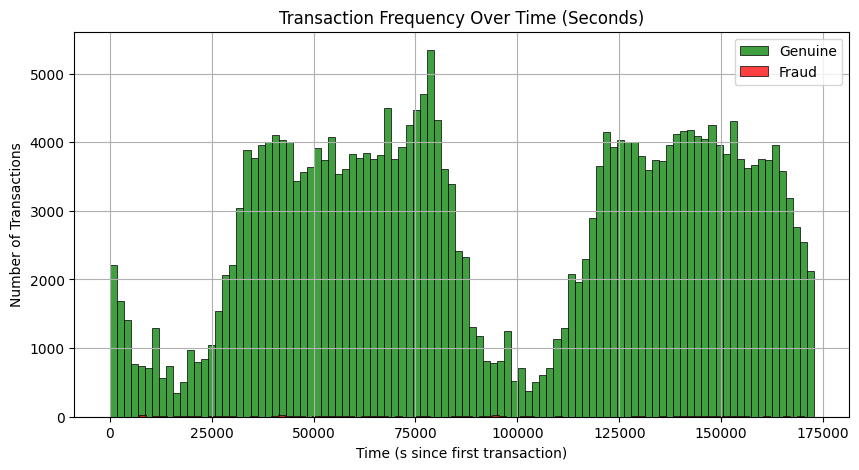

In [ ]:
# ==========================================
# ⏰ Transactions Over Time
# ==========================================

plt.figure(figsize=(10, 5))
sns.histplot(genuine['Time'], bins=100, color='green', label='Genuine', kde=False)
sns.histplot(fraud['Time'], bins=100, color='red', label='Fraud', kde=False)
plt.title('Transaction Frequency Over Time (Seconds)')
plt.xlabel('Time (s since first transaction)')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(True)
plt.show()


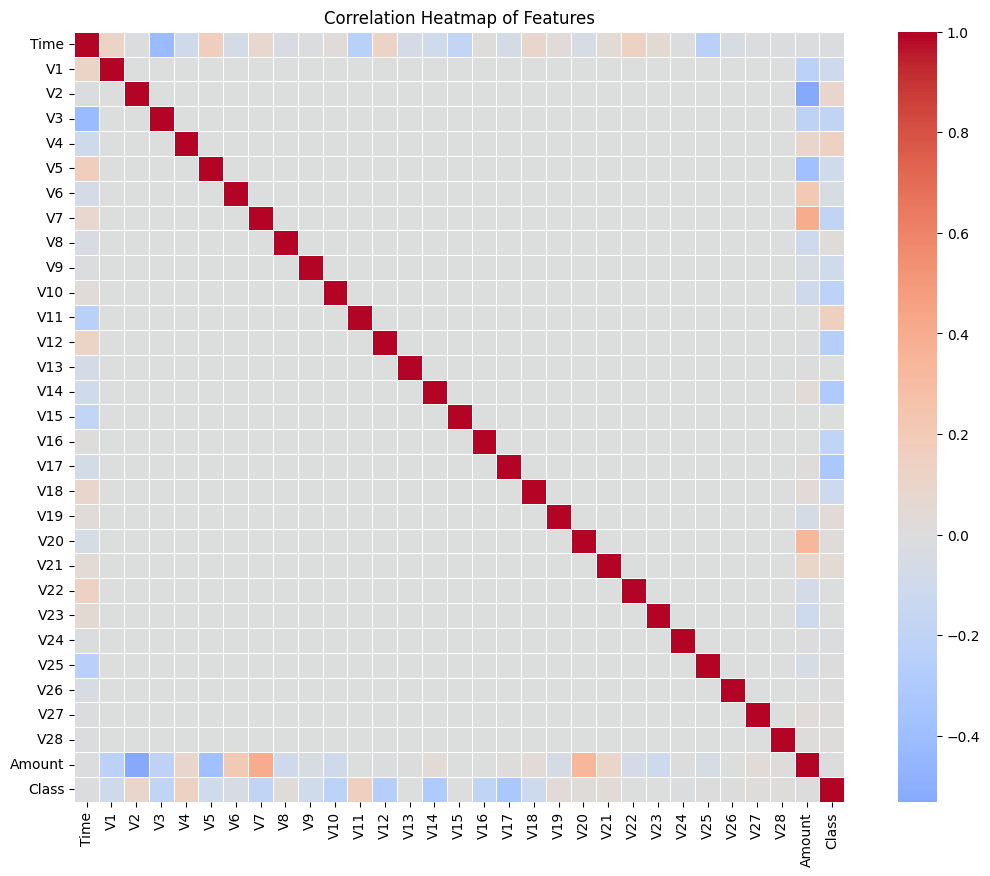

🔍 Features most correlated with Class (Fraud):
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


In [ ]:
# ==========================================
# 🔥 Correlation Heatmap (V Features Only)
# ==========================================
import numpy as np

plt.figure(figsize=(14, 10))

# Compute correlations with 'Class'
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Focused on Class correlations
corr_class = corr['Class'].sort_values(ascending=False)
print("🔍 Features most correlated with Class (Fraud):\n", corr_class.head(10))


# ⚙️ Preprocessing: Scaling, Splitting, and Handling Class Imbalance

The dataset is highly imbalanced, so we take special care before training:
- `Time` and `Amount` are not PCA-transformed and need to be scaled
- We will split the dataset into training and test sets while preserving class ratios
- To address imbalance during training, we’ll later use techniques like:
  - SMOTE (Synthetic Minority Oversampling Technique)
  - Undersampling the majority class
  - Adjusting class weights in model training


In [ ]:
# ==========================================
# ⚙️ Feature Scaling and Train-Test Split
# ==========================================
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Make a copy of the data
df_scaled = df.copy()

# Apply standard scaling to 'Amount' and 'Time'
scaler = StandardScaler()
df_scaled[['scaled_amount', 'scaled_time']] = scaler.fit_transform(df_scaled[['Amount', 'Time']])

# Drop original 'Amount' and 'Time'
df_scaled = df_scaled.drop(['Amount', 'Time'], axis=1)

# Separate features and target
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Split the data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print class distribution in train and test sets
print("✅ Train set class distribution:\n", y_train.value_counts())
print("\n✅ Test set class distribution:\n", y_test.value_counts())


✅ Train set class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64

✅ Test set class distribution:
 Class
0    56864
1       98
Name: count, dtype: int64


# 🤖 Balancing the Training Set with SMOTE

To improve our model's ability to learn from the minority (fraud) class, we use **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE generates synthetic examples of the minority class to balance the dataset.

Note: We apply SMOTE **only to the training set** to avoid data leakage.


In [ ]:
# ==========================================
# 🧪 Applying SMOTE to Balance Training Data
# ==========================================
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply only on training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Show new class distribution
print("✅ Balanced Training Set:\n", y_train_balanced.value_counts())


✅ Balanced Training Set:
 Class
0    227451
1    227451
Name: count, dtype: int64


# 🤖 Model Training & Evaluation

We now train and evaluate three classification models on the balanced training set:
- Logistic Regression (baseline)
- Random Forest Classifier
- XGBoost Classifier (advanced)

Each model will be assessed using:
- Confusion Matrix
- Precision, Recall, F1-Score
- AUC-ROC Curve

The goal is to maximize **recall** (fraud catch rate) while keeping **precision** reasonably high to avoid too many false alarms.


In [ ]:
# 📦 Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# ✅ Utility function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    # Predict class and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Print classification report
    print(f"\n📄 Classification Report: {model_name}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # AUC-ROC Score
    auc = roc_auc_score(y_test, y_proba)
    print(f"🔥 ROC-AUC Score ({model_name}): {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend()
    plt.grid()
    plt.show()



📄 Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



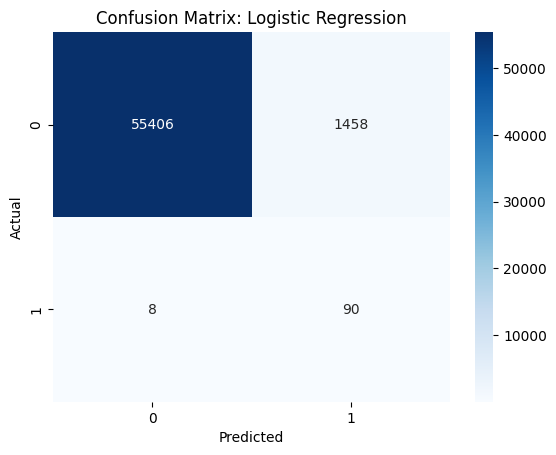

🔥 ROC-AUC Score (Logistic Regression): 0.9698


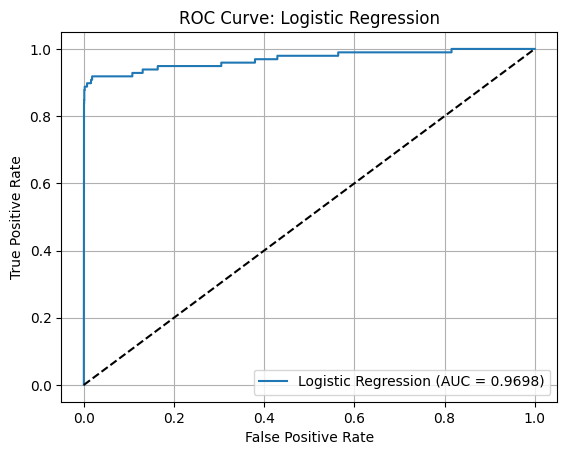

In [ ]:
# ==========================================
# 🧪 Model 1: Logistic Regression (Baseline)
# ==========================================
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)

# Evaluate Logistic Regression
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")



📄 Classification Report: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



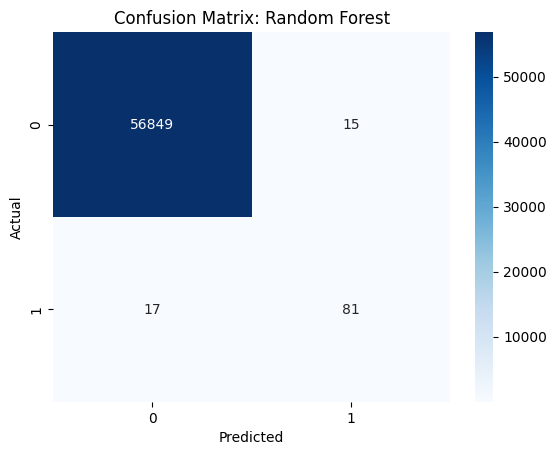

🔥 ROC-AUC Score (Random Forest): 0.9649


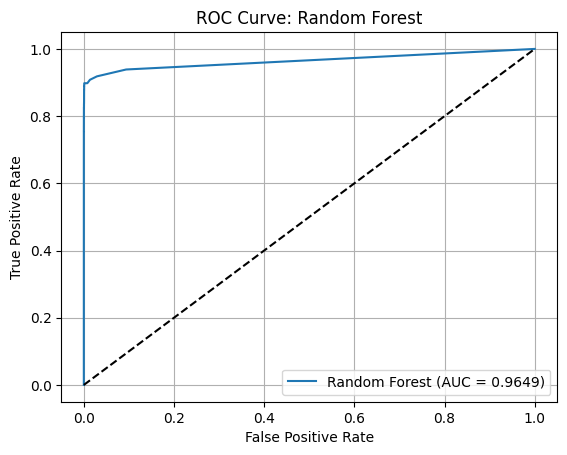

In [ ]:
# ==========================================
# 🌲 Model 2: Random Forest Classifier
# ==========================================
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:01:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📄 Classification Report: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962



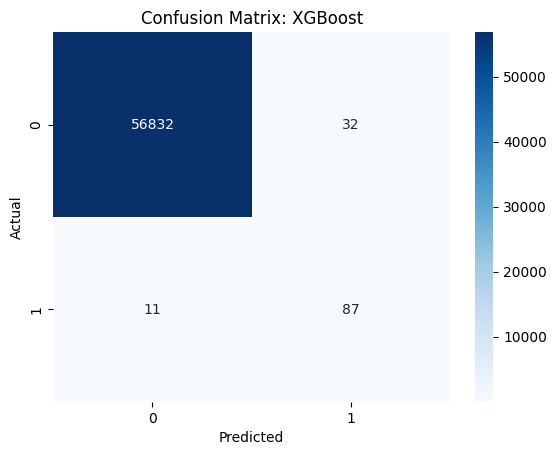

🔥 ROC-AUC Score (XGBoost): 0.9792


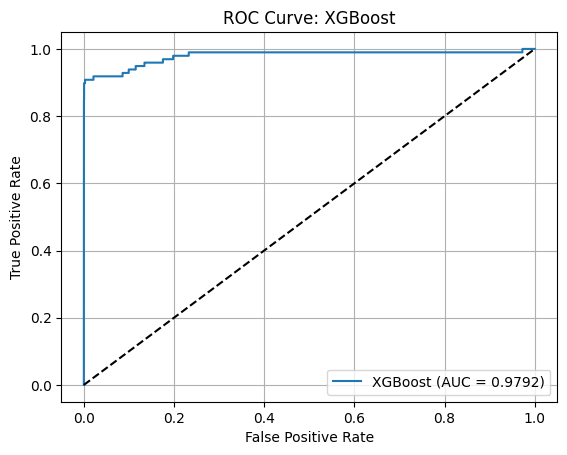

In [ ]:
# ==========================================
# ⚡ Model 3: XGBoost Classifier
# ==========================================
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_balanced, y_train_balanced)

# Evaluate XGBoost
evaluate_model(xgb_model, X_test, y_test, "XGBoost")


# 🧠 Neural Network Model (Feedforward)

We now implement a Feedforward Neural Network (Multilayer Perceptron) using Keras. This model is trained on the **SMOTE-balanced** dataset.

**Architecture**:
- Input layer: 30 features
- Hidden layers: Dense layers with ReLU activation
- Dropout for regularization
- Output layer: 1 neuron (Sigmoid for binary classification)

**Loss Function**: Binary Crossentropy  
**Metric**: AUC, Recall, Precision, F1 (custom callback)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# ==========================================
# 🧠 Building the Neural Network Model
# ==========================================
model_nn = Sequential([
    Dense(64, input_dim=X_train_balanced.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_nn.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

# Show model summary
model_nn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ==========================================
# 🎯 Train Neural Network with Early Stopping
# ==========================================
early_stop = EarlyStopping(
    monitor='val_auc',
    patience=20,
    restore_best_weights=True,
    mode='max'
)

# Train the model
history = model_nn.fit(
    X_train_balanced,
    y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=2048,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - auc: 0.9977 - loss: 0.0575 - val_auc: 0.0000e+00 - val_loss: 0.0345
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - auc: 0.9989 - loss: 0.0385 - val_auc: 0.0000e+00 - val_loss: 0.0165
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - auc: 0.9993 - loss: 0.0267 - val_auc: 0.0000e+00 - val_loss: 0.0101
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - auc: 0.9995 - loss: 0.0198 - val_auc: 0.0000e+00 - val_loss: 0.0072
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - auc: 0.9997 - loss: 0.0146 - val_auc: 0.0000e+00 - val_loss: 0.0042
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - auc: 0.9997 - loss: 0.0126 - val_auc: 0.0000e+00 - val_loss: 0.0035
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - auc: 0.9997 - loss: 0.0105 - val_auc: 0.0000e+00 - val_loss: 0.0026
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - auc: 0.9998 - loss: 0.0089 - val_auc: 0.0000e+00 - val_loss: 0.0025
Epoch 9/50
178/17

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


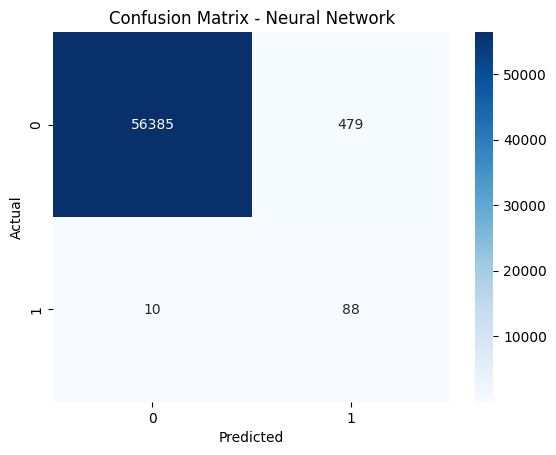

📄 Classification Report - Neural Network
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.90      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962

🔥 ROC-AUC Score - Neural Network: 0.9778


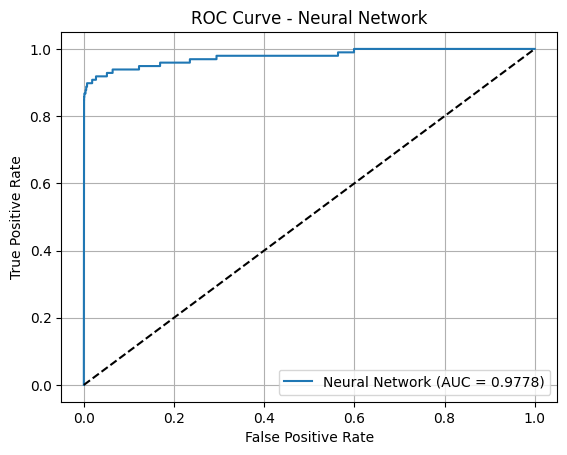

In [ ]:
# ==========================================
# 📊 Evaluate Neural Network on Test Data
# ==========================================
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predict on test data
y_pred_proba_nn = model_nn.predict(X_test).ravel()
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("📄 Classification Report - Neural Network")
print(classification_report(y_test, y_pred_nn))

# AUC Score
auc_nn = roc_auc_score(y_test, y_pred_proba_nn)
print(f"🔥 ROC-AUC Score - Neural Network: {auc_nn:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_nn)
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc_nn:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# ==========================================
# 💾 Save Neural Network Model (Keras .h5)
# ==========================================
model_nn.save("fraud_detection_nn_model.h5")

# Confirm the model is saved
import os
if os.path.exists("fraud_detection_nn_model.h5"):
    print("✅ Model saved successfully as fraud_detection_nn_model.h5")
else:
    print("❌ Model saving failed.")


✅ Model saved successfully as fraud_detection_nn_model.h5


In [ ]:
from google.colab import files
files.download("fraud_detection_nn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>